In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

!wget https://github.com/rajeevratan84/ModernComputerVision/raw/main/walking_short_clip.mp4

--2022-10-18 12:28:59--  https://github.com/rajeevratan84/ModernComputerVision/raw/main/walking_short_clip.mp4
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/walking_short_clip.mp4 [following]
--2022-10-18 12:29:00--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/walking_short_clip.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 181894 (178K) [application/octet-stream]
Saving to: ‘walking_short_clip.mp4’

walking_short_clip. 100%[===================>] 177.63K  --.-KB/s    in 0.02s   

2022-10-18 12:29:00 (7.62 MB/s) - ‘walk

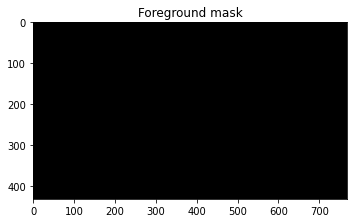

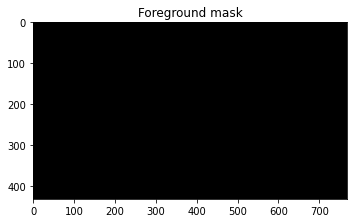

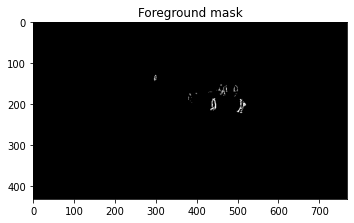

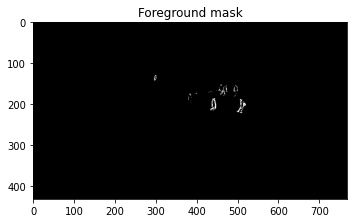

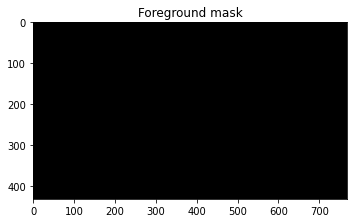

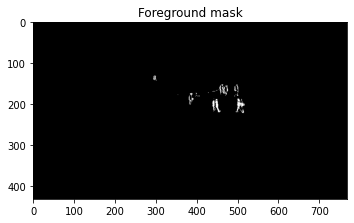

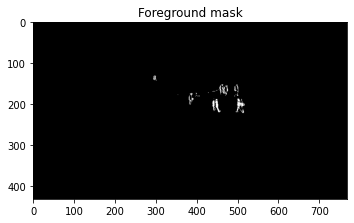

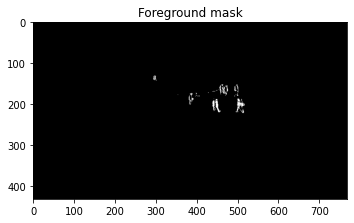

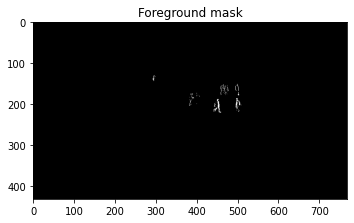

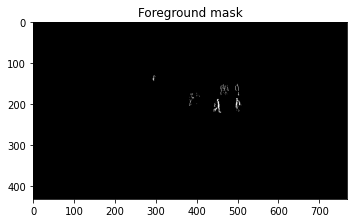

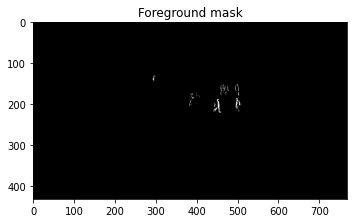

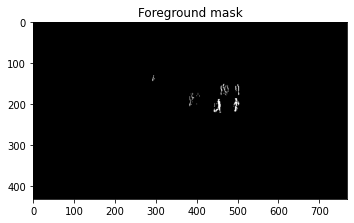

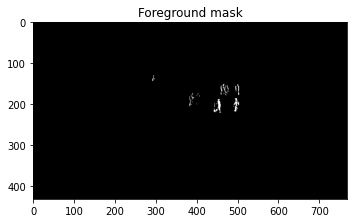

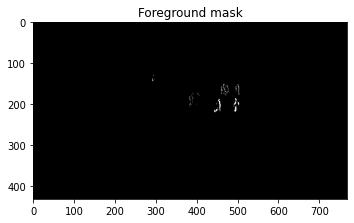

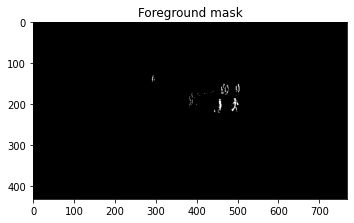

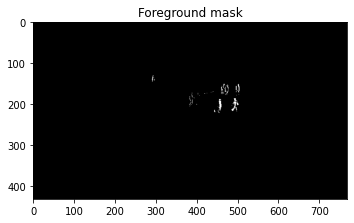

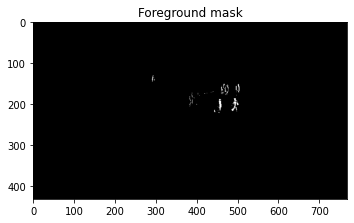

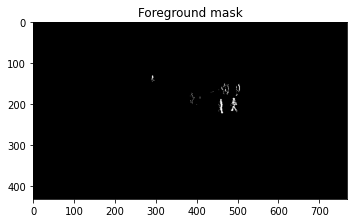

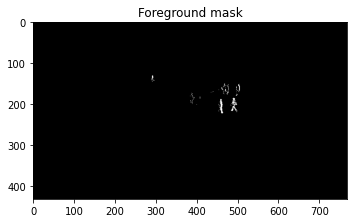

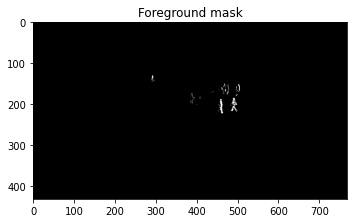

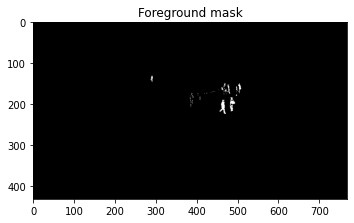

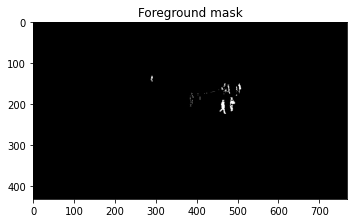

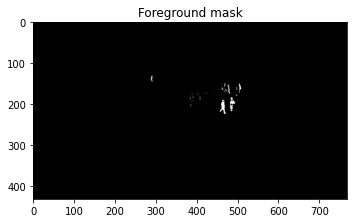

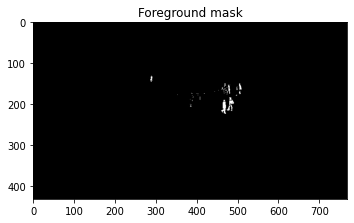

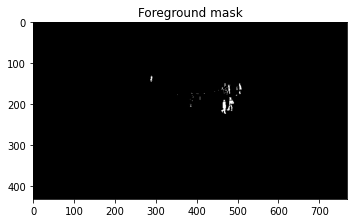

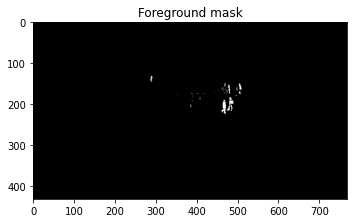

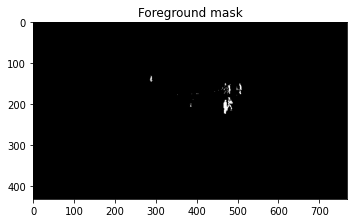

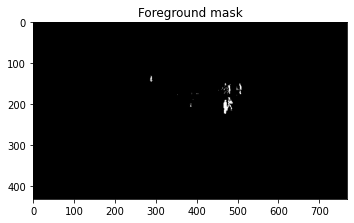

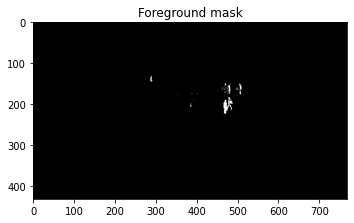

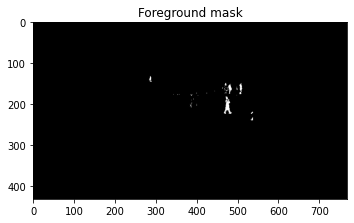

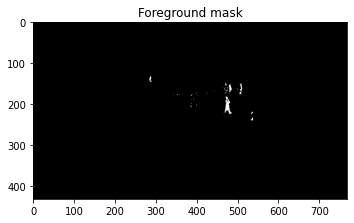

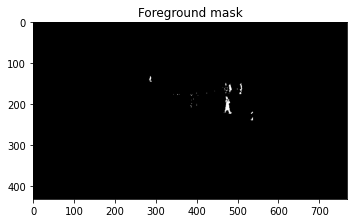

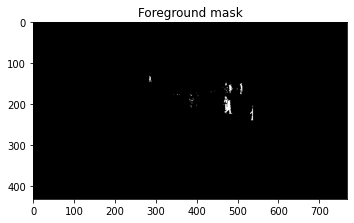

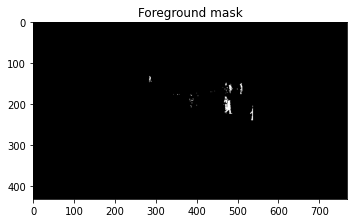

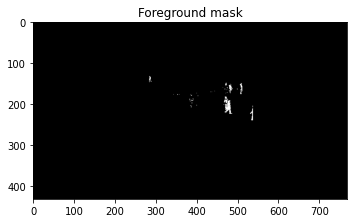

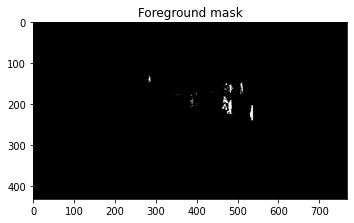

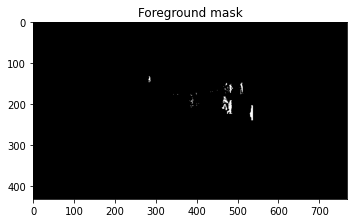

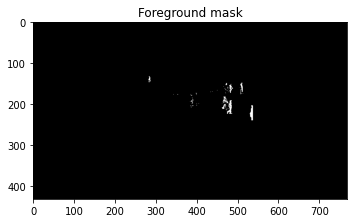

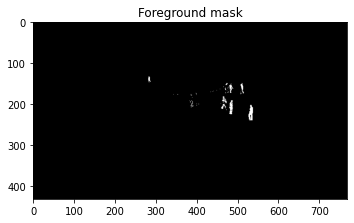

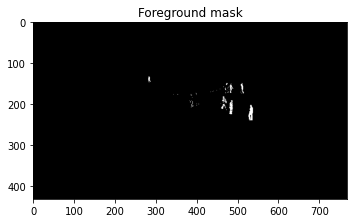

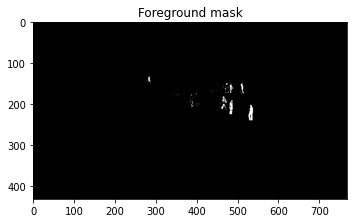

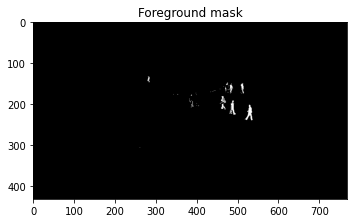

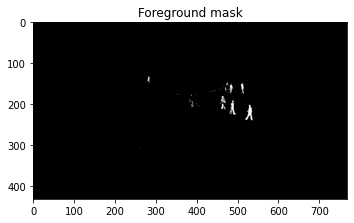

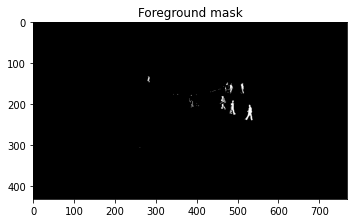

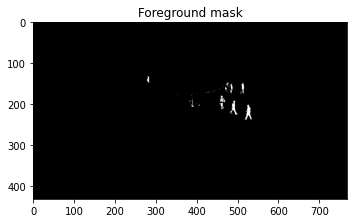

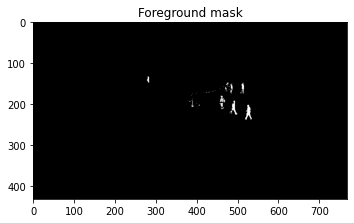

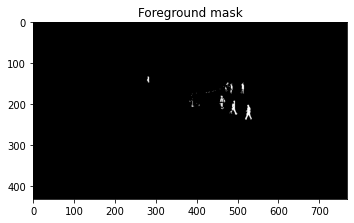

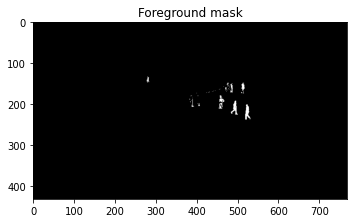

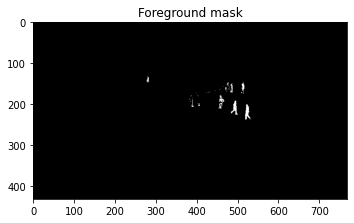

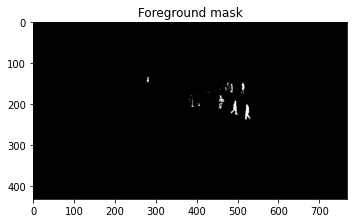

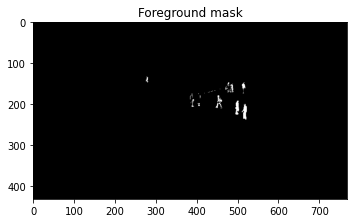

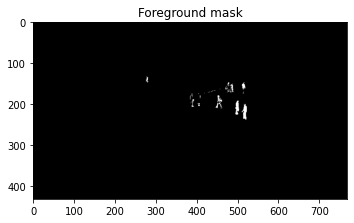

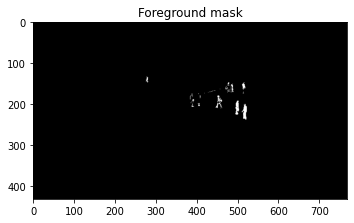

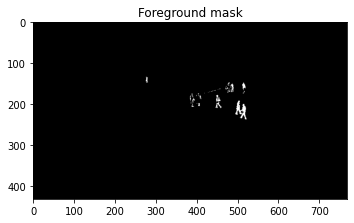

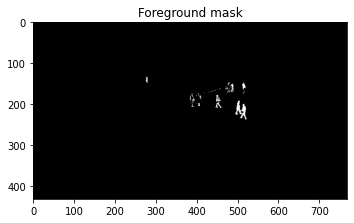

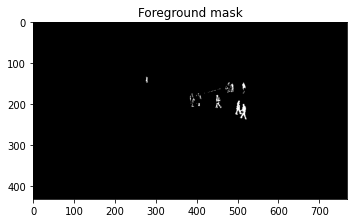

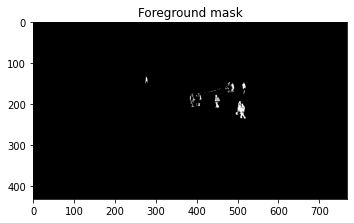

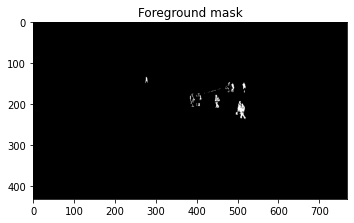

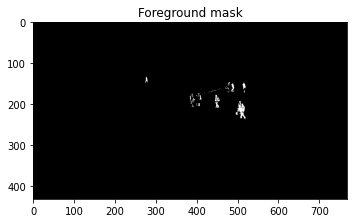

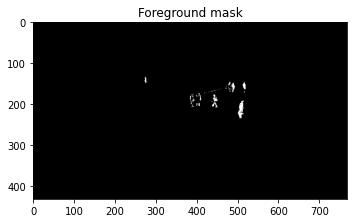

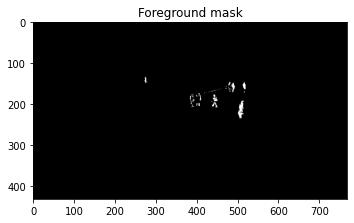

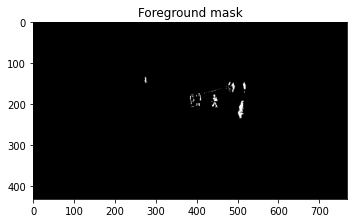

In [3]:
cap = cv2.VideoCapture('/content/walking_short_clip.mp4')

#height and weight of the frame
w = int(cap.get(3))
h = int(cap.get(4))

out = cv2.VideoWriter('walking_output_GM.avi', cv2.VideoWriter_fourcc('M','J','P','G'),30 ,(w,h))

foreground_background = cv2.bgsegm.createBackgroundSubtractorMOG()

#loop once video is successfully loaded
while True:
  ret, frame = cap.read()

  if ret:
    foreground_mask = foreground_background.apply(frame)
    out.write(foreground_mask)
    imshow('Foreground mask', foreground_mask)
  else:
    break

cap.release()
out.release()

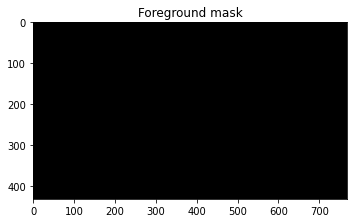

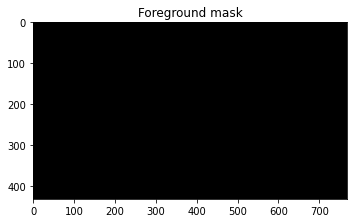

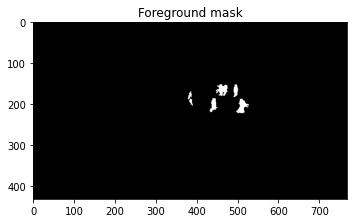

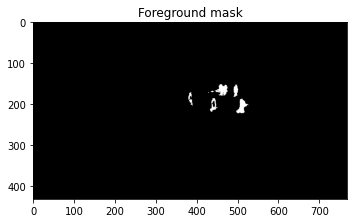

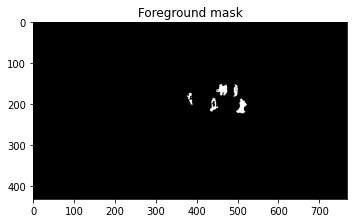

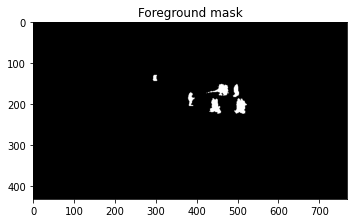

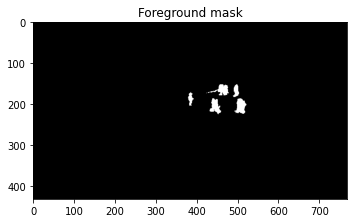

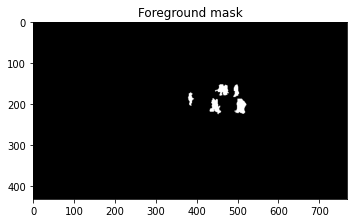

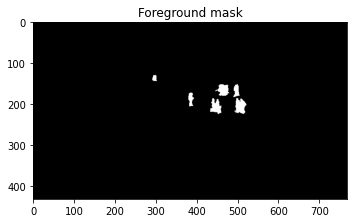

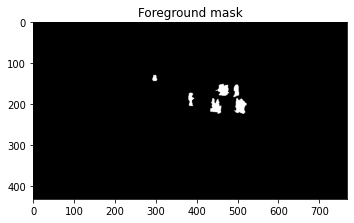

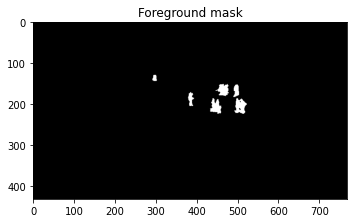

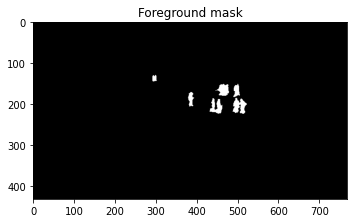

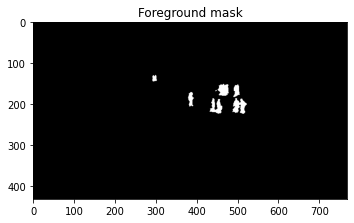

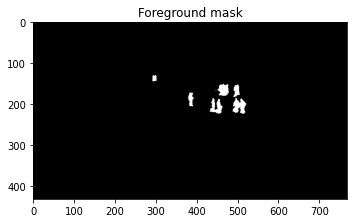

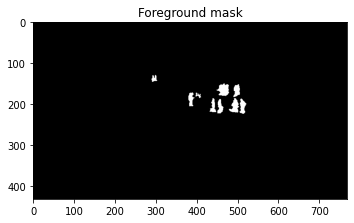

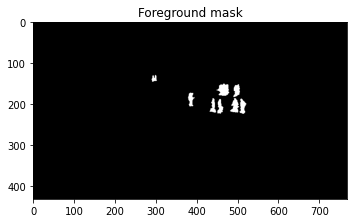

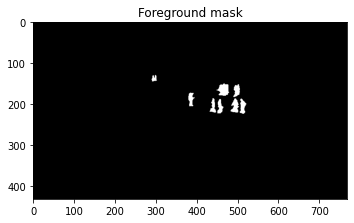

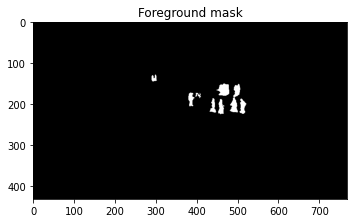

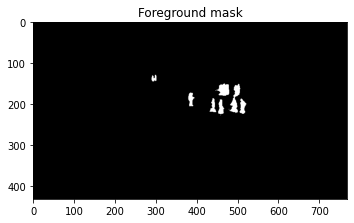

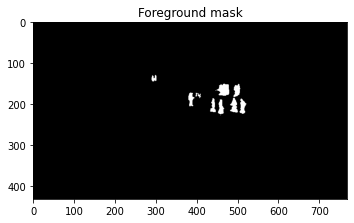

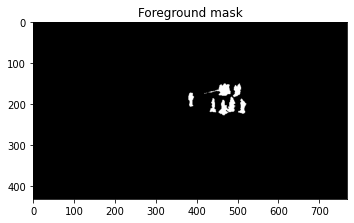

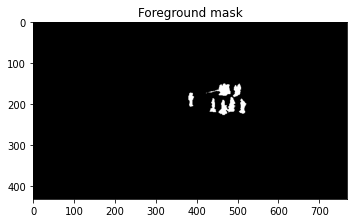

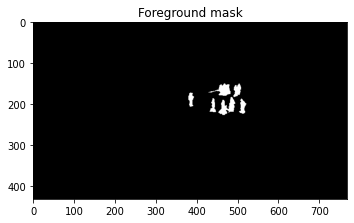

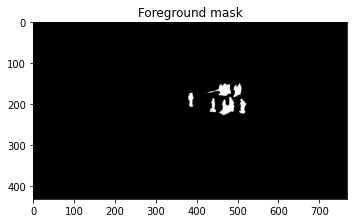

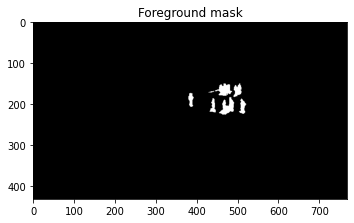

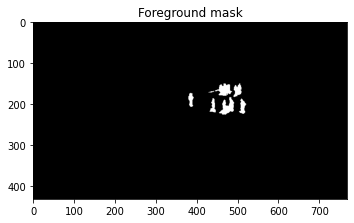

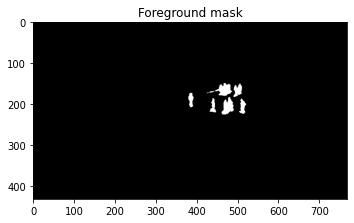

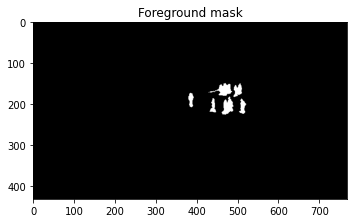

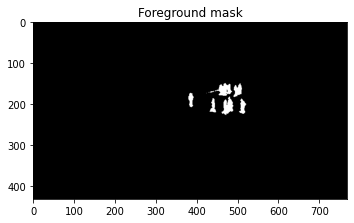

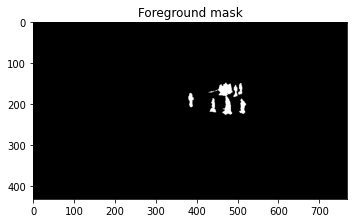

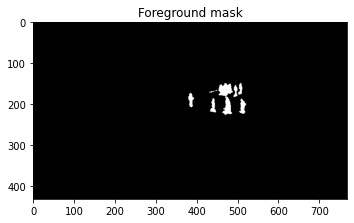

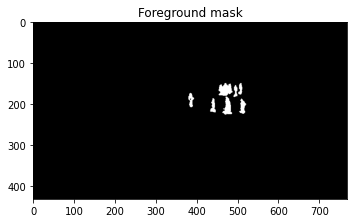

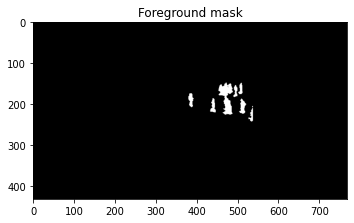

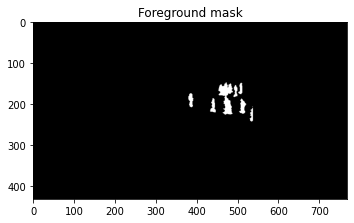

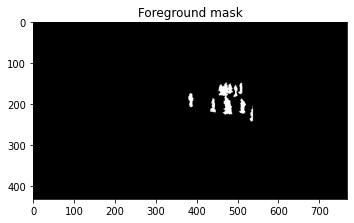

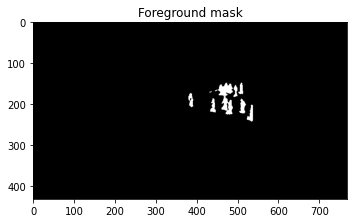

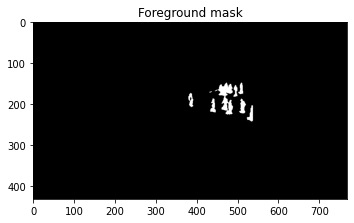

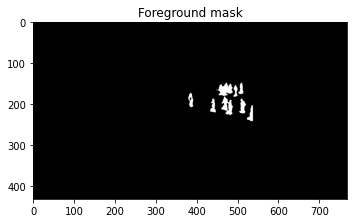

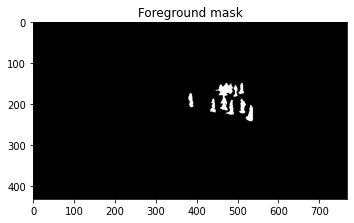

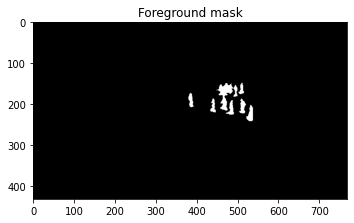

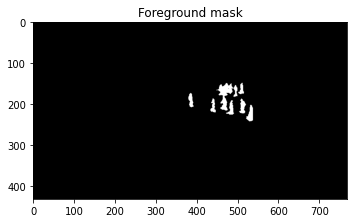

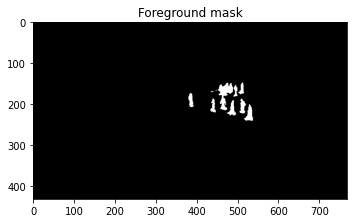

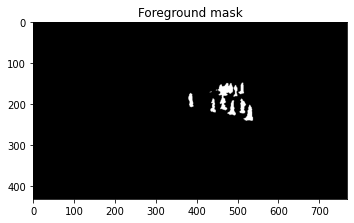

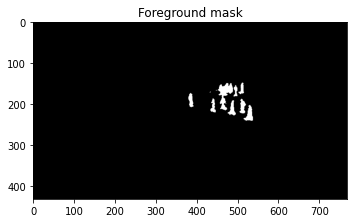

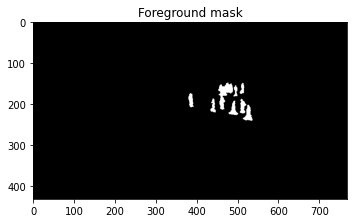

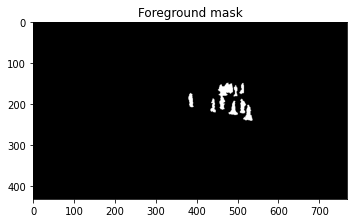

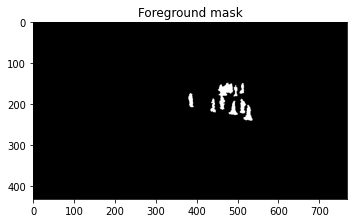

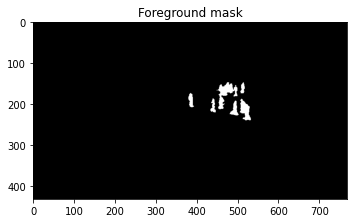

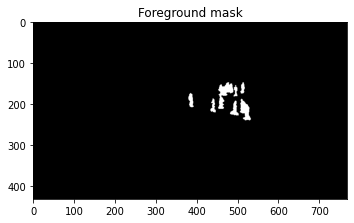

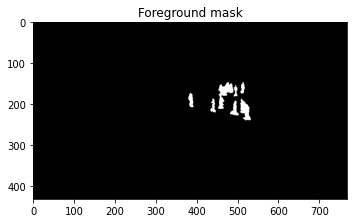

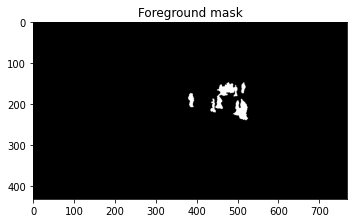

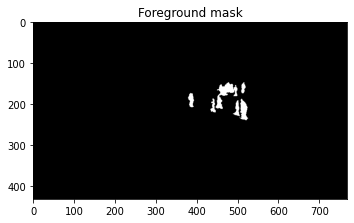

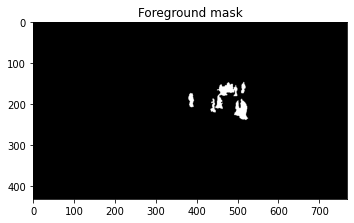

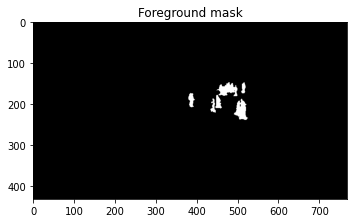

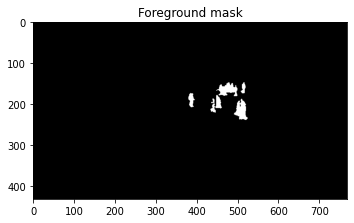

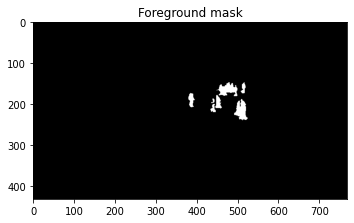

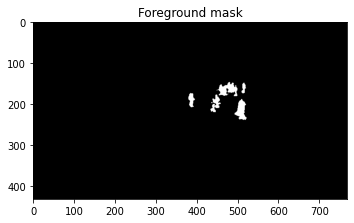

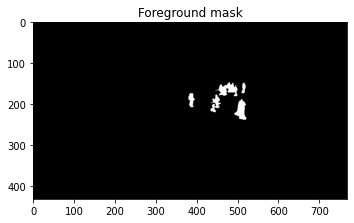

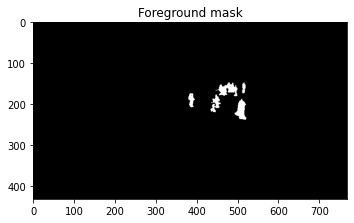

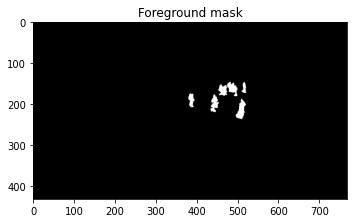

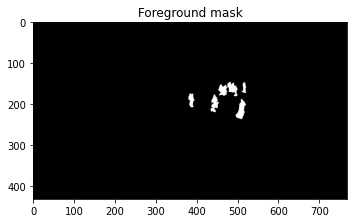

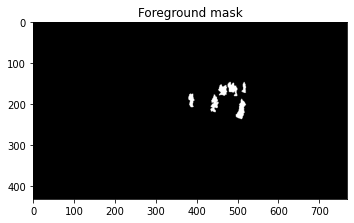

In [10]:
cap = cv2.VideoCapture('/content/walking_short_clip.mp4')

#height and weight of the frame
w = int(cap.get(3))
h = int(cap.get(4))

out = cv2.VideoWriter('walking_output_GM.avi', cv2.VideoWriter_fourcc('M','J','P','G'),30 ,(w,h))

foreground_background = cv2.bgsegm.createBackgroundSubtractorGSOC()

#loop once video is successfully loaded
while True:
  ret, frame = cap.read()

  if ret:
    foreground_mask = foreground_background.apply(frame)
    out.write(foreground_mask)
    imshow('Foreground mask', foreground_mask)
  else:
    break

cap.release()
out.release()

In [9]:
cap = cv2.VideoCapture('/content/walking_short_clip.mp4')

w= int(cap.get(3))
h = int(cap.get(4))

out = cv2.VideoWriter('aslking_output_AGMM.avi', cv2.VideoWriter_fourcc('M','J','P','G'),30,(w,h))
ret, frame = cap.read()

average = np.float32(frame)

while True:
  ret, frame = cap.read()
  if ret:
    cv2.accumulateWeighted(frame, average, 0.01)
    background = cv2.convertScaleAbs(average)

    
    imshow('input', frame)
    imshow('disapearing background', background)
    out.write(background)
  else:
    break

cap.release()
out.release()


Output hidden; open in https://colab.research.google.com to view.

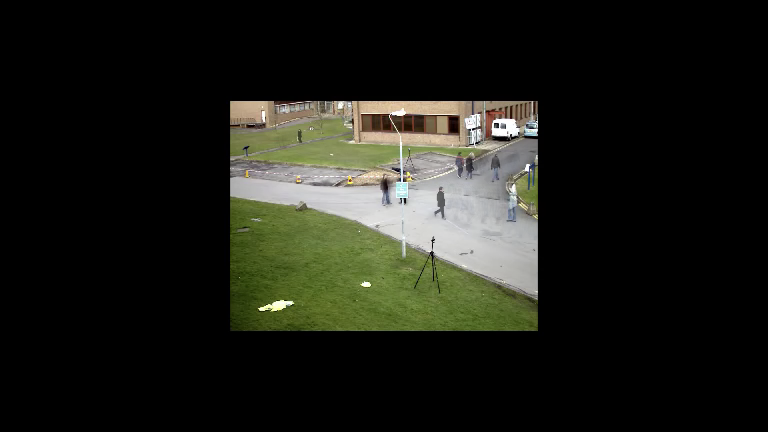

In [11]:
cv2_imshow(background)

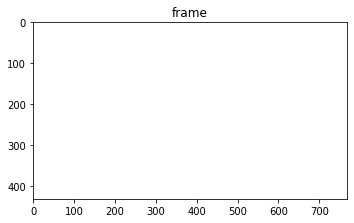

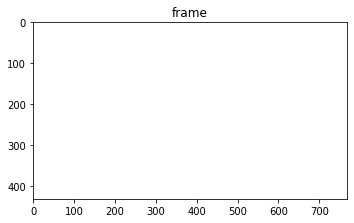

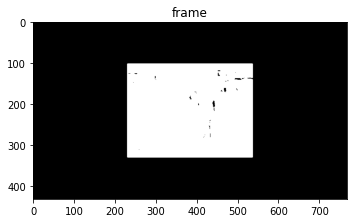

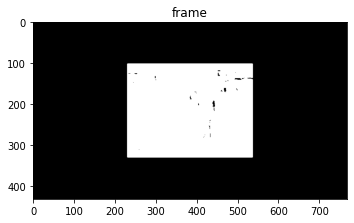

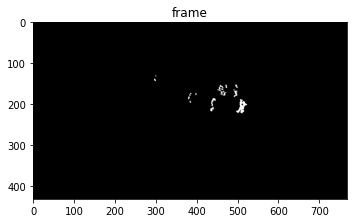

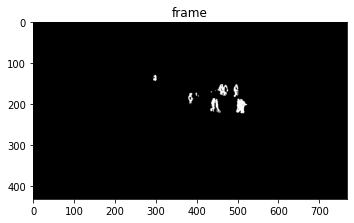

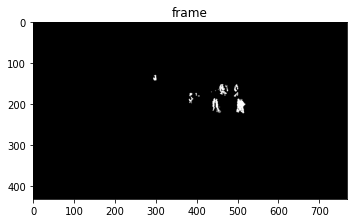

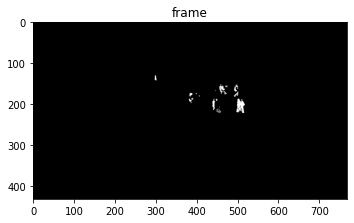

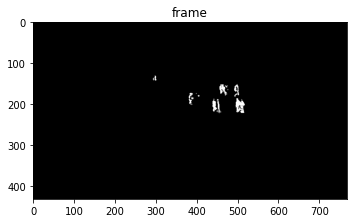

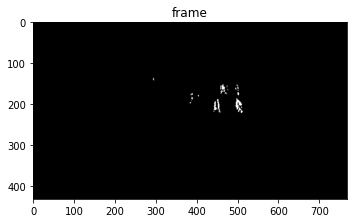

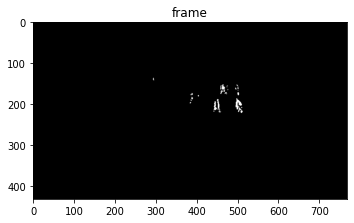

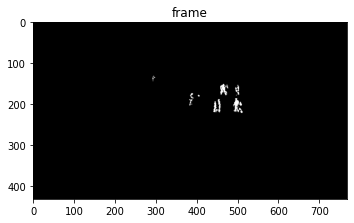

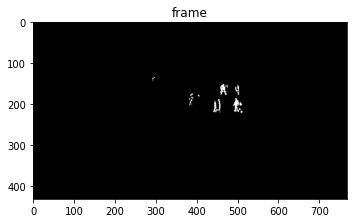

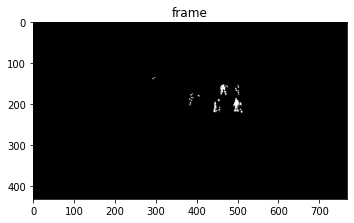

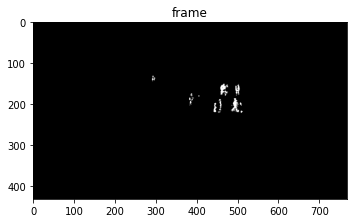

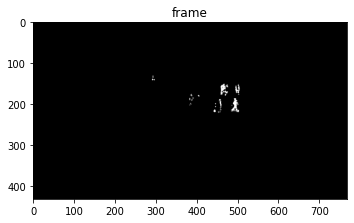

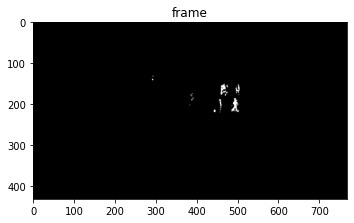

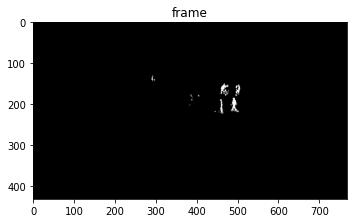

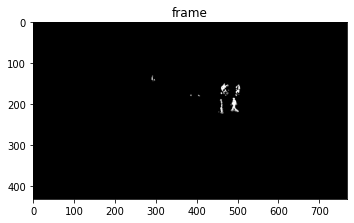

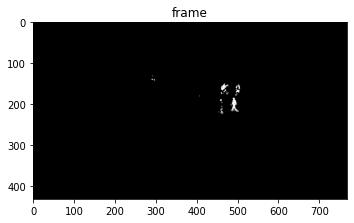

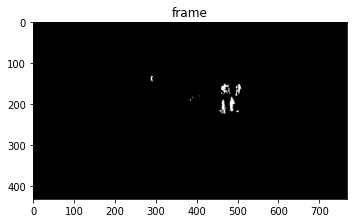

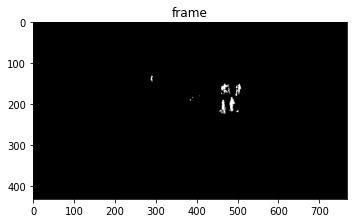

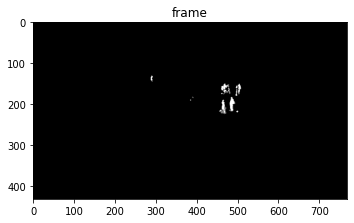

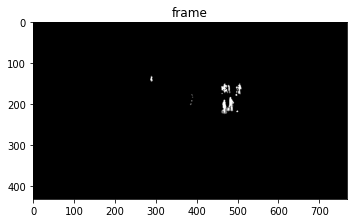

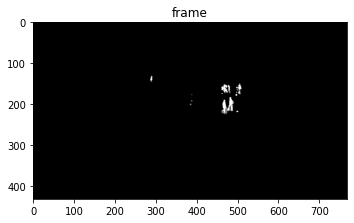

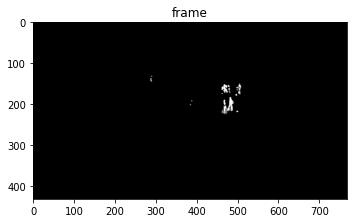

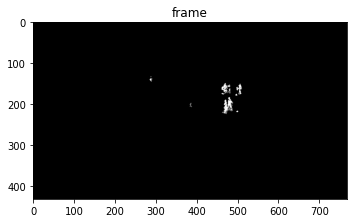

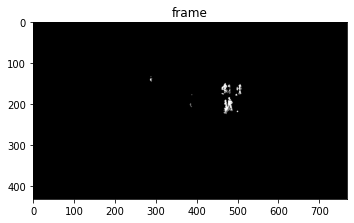

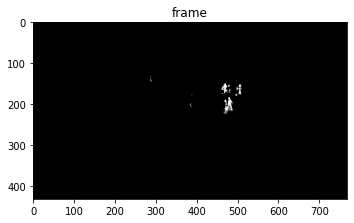

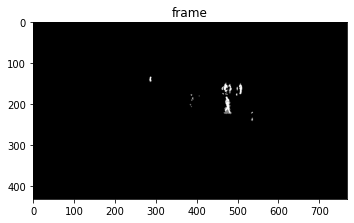

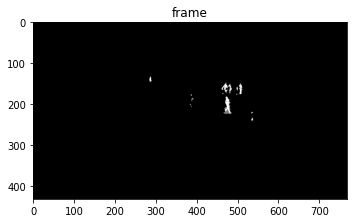

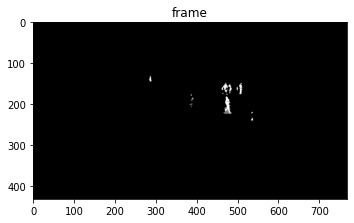

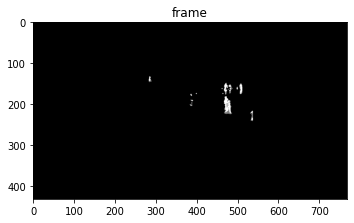

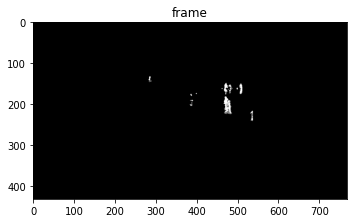

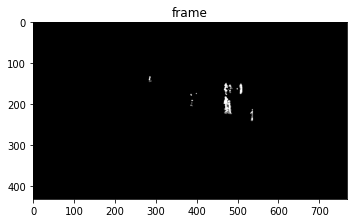

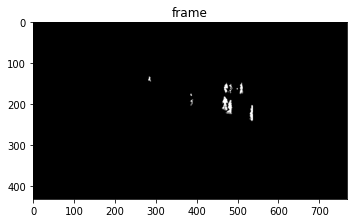

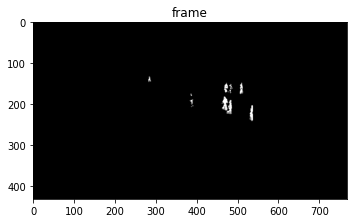

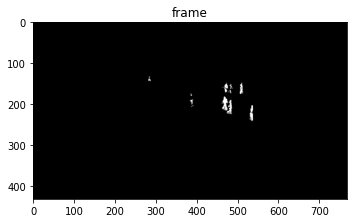

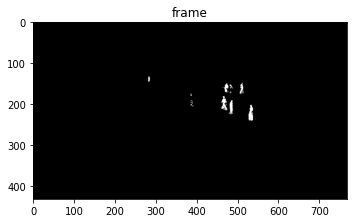

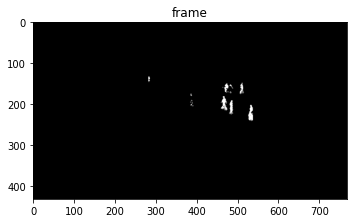

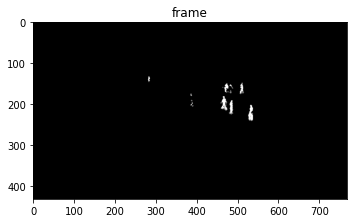

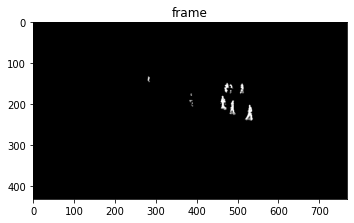

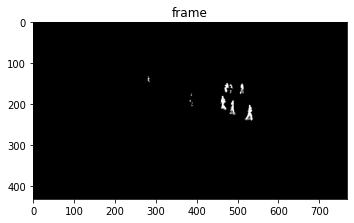

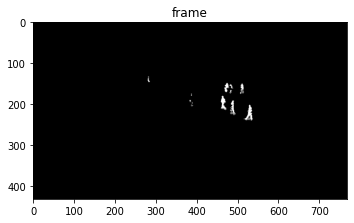

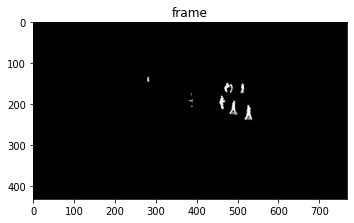

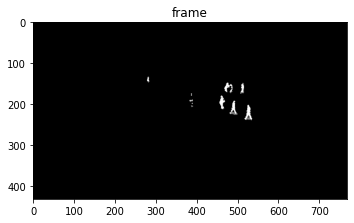

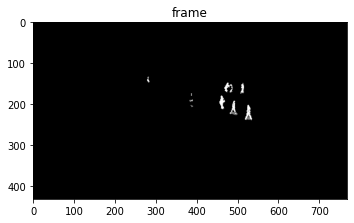

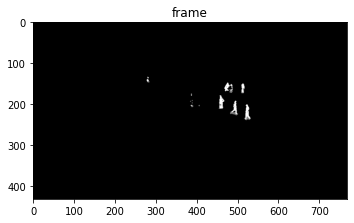

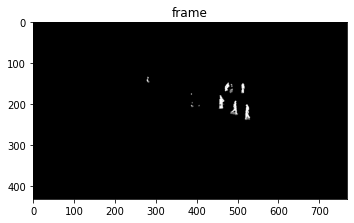

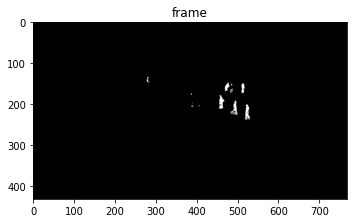

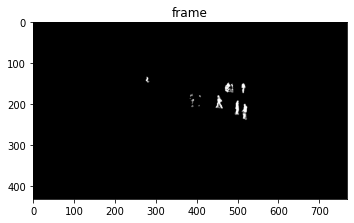

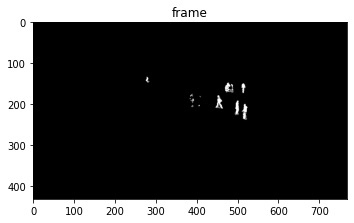

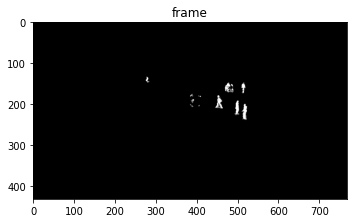

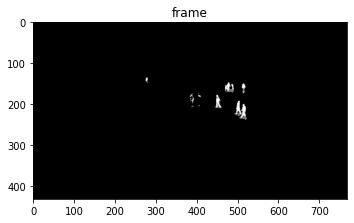

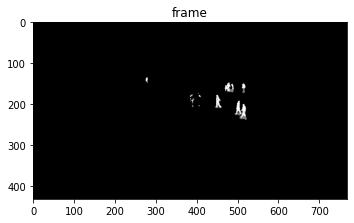

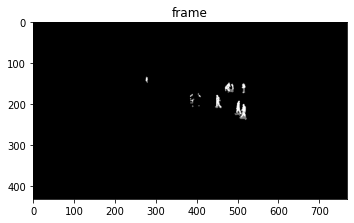

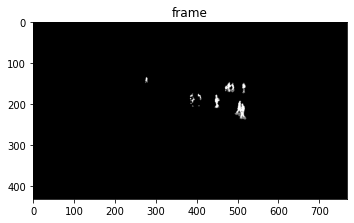

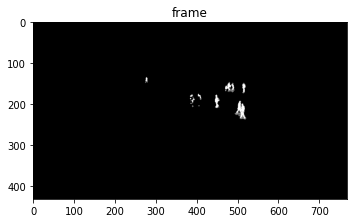

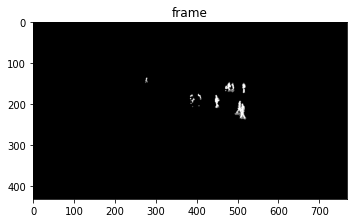

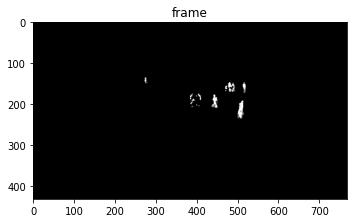

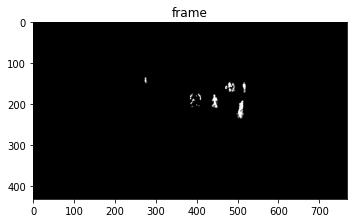

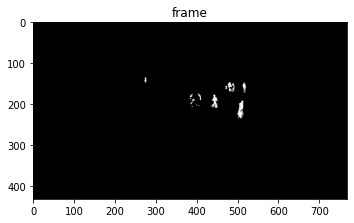

In [15]:
cap = cv2.VideoCapture('/content/walking_short_clip.mp4')

#height and weight of the frame
w = int(cap.get(1))
h = int(cap.get(2))

out = cv2.VideoWriter('walking_output_GM.avi', cv2.VideoWriter_fourcc('M','J','P','G'),30 ,(w,h))

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
fgbg = cv2.createBackgroundSubtractorKNN()


#loop once video is successfully loaded
while True:
  ret, frame = cap.read()

  if ret:
    fgmask = fgbg.apply(frame)
    fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)

    imshow('frame', fgmask)
  else:
    break

cap.release()
out.release()